## Scatter plots of the width and height of the mammograms and masks

In [11]:
import os
import pandas as pd
import pathlib as pt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

In [5]:
DATA_PATH = pt.Path("D:\work\BreastTumorSegmentation\dataset\original_size")
IMGS_DIR  = "images"
MASKS_DIR = "masks"

In [6]:
imgs = list((DATA_PATH/IMGS_DIR).glob("*"))
masks = list((DATA_PATH/MASKS_DIR).glob("*"))
print("Found # {} images {} masks".format(len(imgs), len(masks)))

Found # 3568 images 3568 masks


In [13]:
dimension = {"img_width":   [],
             "img_height":  [],
             "mask_width":  [],
             "mask_height": []}

for img_path in tqdm(imgs, desc="Images"):
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
    dimension["img_height"].append(img.shape[0])
    dimension["img_width"].append(img.shape[1])
    
for mask_path in tqdm(masks, desc="Masks"):  
    mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)
    dimension["mask_height"].append(mask.shape[0])
    dimension["mask_width"].append(mask.shape[1])

print("Imgs: {} {} Masks {} {}".format(len(dimension["img_height"]), 
                                       len(dimension["img_width"]),
                                       len(dimension["mask_height"]), 
                                       len(dimension["mask_width"])))

Masks: 100%|███████████████████████████████████████████████████████████████████████| 3568/3568 [02:42<00:00, 21.94it/s]

Imgs: 3568 3568 Masks 3568 3568


In [14]:
dim_df = pd.DataFrame(data=dimension)
dim_df.head()

,img_width,img_height,mask_width,mask_height
0,2761,5056,2761,5056
1,2836,5386,2836,5386
2,2986,5356,2986,5356
3,3166,5491,3166,5491
4,3064,4568,3064,4568


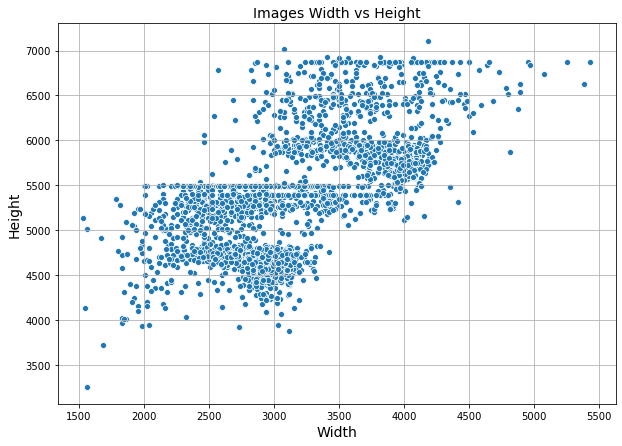

In [19]:
_img = dim_df[["img_height", "img_width"]]
fig = plt.figure(figsize=(10, 7))
ax = sns.scatterplot(x="img_width", y="img_height", data=_img)
ax.set_title("Images Width vs Height", fontsize=14)
ax.set_xlabel("Width", fontsize=14)
ax.set_ylabel("Height", fontsize=14)
ax.grid(True)

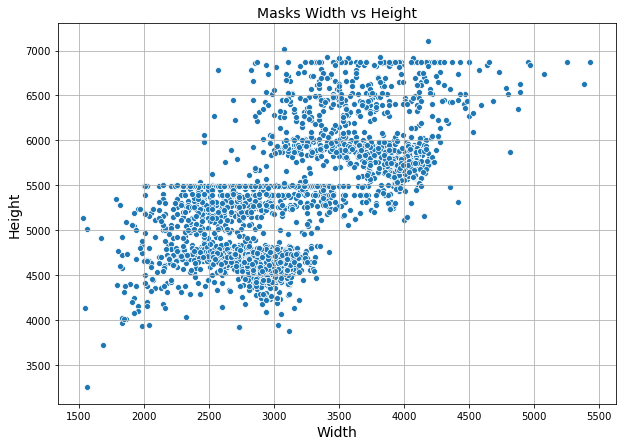

In [20]:
_mask = dim_df[["mask_height", "mask_width"]]
fig = plt.figure(figsize=(10, 7))
ax = sns.scatterplot(x="mask_width", y="mask_height", data=_mask)
ax.set_title("Masks Width vs Height", fontsize=14)
ax.set_xlabel("Width", fontsize=14)
ax.set_ylabel("Height", fontsize=14)
ax.grid(True)